# 常用的图像特征

## 颜色特征

In [5]:
from skimage import data, img_as_float, exposure

# 如果需要使用参数nbins，需要将图像数据从[0, 255]转换到[0, 1]
camera = img_as_float(data.camera())

# 颜色直方图
hist, bin_centers = exposure.histogram(camera, nbins=10)
print(hist)
print(bin_centers)

[51199  8554  6922  8834 31923 45742 82660 23862  1470   978]
[ 0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95]


## SIFT 特征 (DAISY特征)

(3, 3, 104)


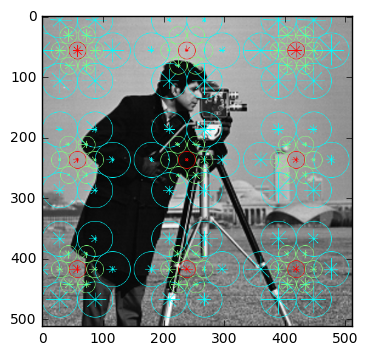

In [13]:
from skimage.feature import daisy
import matplotlib.pyplot as plt
%matplotlib inline

daisy_feat, daisy_img = daisy(camera,step=180, radius=58, rings=2, histograms=6, visualize=True)
#daisy_feat, daisy_img = daisy(camera, visualize=True)
print(daisy_feat.shape)
plt.imshow(daisy_img)

## HOG 特征

(311364,)


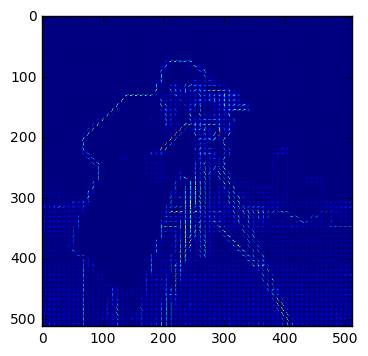

In [15]:
from skimage.feature import hog
import matplotlib.pyplot as plt
%matplotlib inline

hog_feat, hog_img = hog(camera, visualise=True)
print(hog_feat.shape)
plt.imshow(hog_img)

## 人脸识别

* 图片格式支持JPEG, PNG, GIF和BMP
* 图片大小不能过大或过小，有效的图像大小为 1KB-4MB
* 可检测出的人脸区域为36x36到4096x4096
* 最多可检测出64张人脸

In [2]:
import cognitive_face as CF
import os

Key = 'xxxxxxxx' # 这里请替换成自己申请的key
CF.Key.set(Key)
image_filepath = './images/big-bang-theory-group.jpg'
face_list = CF.face.detect(image_filepath)
print(face_list)
print('检测出{}张人脸'.format(len(face_list)))

[{'faceRectangle': {'top': 103, 'left': 47, 'height': 55, 'width': 55}, 'faceId': '0652c4dd-1143-4fd0-b619-c2e3bdd91b8e'}, {'faceRectangle': {'top': 81, 'left': 264, 'height': 55, 'width': 55}, 'faceId': 'f2dc9e3c-03e5-4c1a-9425-c5ad9a05742b'}, {'faceRectangle': {'top': 122, 'left': 410, 'height': 51, 'width': 51}, 'faceId': 'a2c36332-cdcc-4c83-a773-27342c021382'}, {'faceRectangle': {'top': 105, 'left': 133, 'height': 49, 'width': 49}, 'faceId': '0c789eda-b7df-4e2c-98ac-61e361ec85a8'}, {'faceRectangle': {'top': 102, 'left': 513, 'height': 46, 'width': 46}, 'faceId': '7acdf023-1462-4d99-893a-657afdd866b8'}]
检测出5张人脸


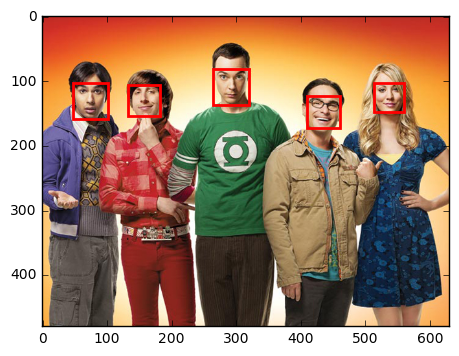

In [49]:
from skimage import io
from matplotlib.patches import Rectangle

image = io.imread('./images/big-bang-theory-group.jpg')
plt.imshow(image)
currentAxis = plt.gca()

for face in face_list:
    face_rect = face['faceRectangle']
    currentAxis.add_patch(Rectangle((face_rect['left'], face_rect['top']), face_rect['width'], face_rect['height'], color='r', linewidth=2, fill=False))

[{'faceRectangle': {'width': 65, 'height': 65, 'left': 159, 'top': 307}, 'faceId': '298a7d3f-6746-4a32-aca4-e6ad1a5f0bfb'}, {'faceRectangle': {'width': 52, 'height': 52, 'left': 551, 'top': 286}, 'faceId': 'f4bb0356-fca3-4b9f-8ed5-a14051662ced'}]
检测出2张人脸


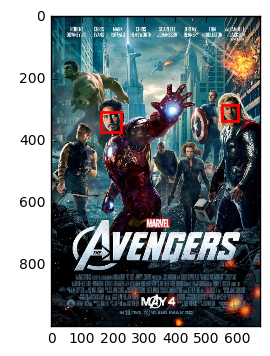

In [56]:
import cognitive_face as CF
import os

Key = 'xxxxxxxx' # 这里请替换成自己申请的key
CF.Key.set(Key)
image_filepath = 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTk2NTI1MTU4N15BMl5BanBnXkFtZTcwODg0OTY0Nw@@._V1_SY1000_CR0,0,675,1000_AL_.jpg'
face_list = CF.face.detect(image_filepath)
print(face_list)
print('检测出{}张人脸'.format(len(face_list)))

from matplotlib.patches import Rectangle

image = io.imread('https://images-na.ssl-images-amazon.com/images/M/MV5BMTk2NTI1MTU4N15BMl5BanBnXkFtZTcwODg0OTY0Nw@@._V1_SY1000_CR0,0,675,1000_AL_.jpg')
plt.imshow(image)
currentAxis = plt.gca()

for face in face_list:
    face_rect = face['faceRectangle']
    currentAxis.add_patch(Rectangle((face_rect['left'], face_rect['top']), face_rect['width'], face_rect['height'], color='r', linewidth=2, fill=False))